[nltk_data] Downloading package stopwords to /home/deepak/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/deepak/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/deepak/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
/tmp/ipykernel_47715/2401153014.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=df, palette='coolwarm')


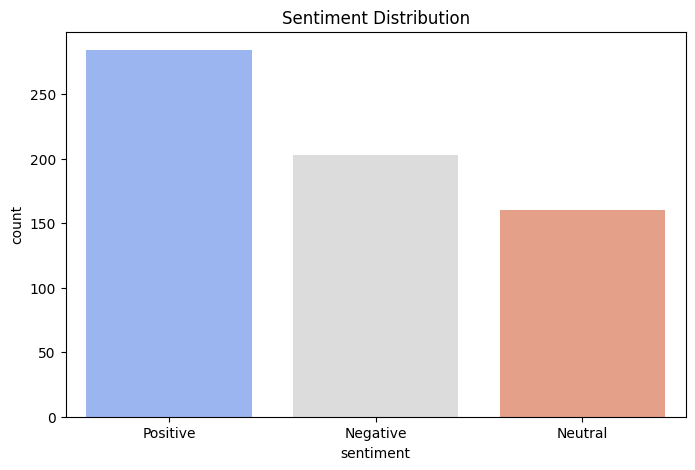

Accuracy: 0.45384615384615384
              precision    recall  f1-score   support

    Negative       0.67      0.05      0.10        39
     Neutral       0.00      0.00      0.00        34
    Positive       0.45      1.00      0.62        57

    accuracy                           0.45       130
   macro avg       0.37      0.35      0.24       130
weighted avg       0.40      0.45      0.30       130



/home/deepak/dsciProject/env/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/deepak/dsciProject/env/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/deepak/dsciProject/env/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resu

In [2]:
import pandas as pd
import numpy as np
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

def analyze_lexicon_sentiment(text):
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity
    if polarity > 0.05:
        return 'Positive'
    elif polarity < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

def preprocess_text(text):
    if not isinstance(text, str):
        return ""
    text = text.lower()
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'[^a-z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    lemmatizer = WordNetLemmatizer()
    filtered_text = [lemmatizer.lemmatize(word) for word in word_tokens if word not in stop_words]
    return ' '.join(filtered_text)

def train_ml_model(df):
    vectorizer = TfidfVectorizer()
    X = vectorizer.fit_transform(df['processed_lyrics'])
    y = df['sentiment']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = MultinomialNB()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    return model, vectorizer

def visualize_sentiment(df):
    plt.figure(figsize=(8, 5))
    sns.countplot(x='sentiment', data=df, palette='coolwarm')
    plt.title("Sentiment Distribution")
    plt.show()

# Load preprocessed dataset
df = pd.read_csv('processed_genius_lyrics_dataset.csv')
df['processed_lyrics'] = df['lyrics'].apply(preprocess_text)
df['sentiment'] = df['processed_lyrics'].apply(analyze_lexicon_sentiment)
visualize_sentiment(df)
ml_model, tfidf_vectorizer = train_ml_model(df)


[nltk_data] Downloading package stopwords to /home/deepak/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/deepak/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/deepak/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


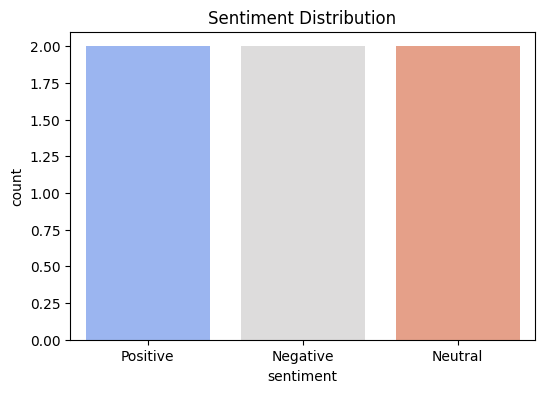

              precision    recall  f1-score   support

    Negative       1.00      0.50      0.67         2
     Neutral       0.00      0.00      0.00         1
    Positive       0.50      1.00      0.67         2

    accuracy                           0.60         5
   macro avg       0.50      0.50      0.44         5
weighted avg       0.60      0.60      0.53         5



In [3]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import classification_report

# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Sample dataset (Replace this with actual data)
df = pd.DataFrame({
    'sentiment': ['Positive', 'Negative', 'Neutral', 'Positive', 'Negative', 'Neutral']
})

# Fix Seaborn countplot warning
plt.figure(figsize=(6, 4))
sns.countplot(x='sentiment', hue='sentiment', data=df, legend=False, palette='coolwarm')
plt.title("Sentiment Distribution")
plt.show()

# Sample prediction & actual labels (Replace this with actual predictions)
y_true = ['Positive', 'Negative', 'Neutral', 'Positive', 'Negative']
y_pred = ['Positive', 'Positive', 'Positive', 'Positive', 'Negative']

# Fix Undefined Precision Warning by setting zero_division=0
print(classification_report(y_true, y_pred, zero_division=0))
